In [1]:
# Taking TITANIC dataset

In [2]:
# Importing all necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
# Importing titanic dataset from csv file

In [5]:
df=pd.read_csv("C://Users//acer//Desktop//1sem//python//My stuff//titanic//train.csv")

In [6]:
# looking at first few rows 

In [7]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
# looking at last few rows

In [9]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# listing stats value of dataset

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# looking at the shape of dataset ie, rows and columns

In [13]:
df.shape

(891, 12)

In [14]:
# listing all columns names

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# renaming column name in lower case

In [17]:
df.columns=map(str.lower,df.columns)

In [18]:
# Looking at the changed variable name in lower case

In [19]:
df.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
# Looking at each columns unique values and their counts 

In [21]:
df.groupby("survived").size()

survived
0    549
1    342
dtype: int64

In [22]:
df.groupby("pclass").size()

pclass
1    216
2    184
3    491
dtype: int64

In [23]:
df.groupby("sex").size()

sex
female    314
male      577
dtype: int64

In [24]:
df.groupby("age").size()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

In [25]:
df.groupby("sibsp").size()

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [26]:
df.groupby("parch").size()

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [27]:
df.groupby("cabin").size()

cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [28]:
df.groupby("embarked").size()

embarked
C    168
Q     77
S    644
dtype: int64

In [29]:
# decoding columns sex in binary digit

In [30]:
df["sex"]=[0 if x=="female" else 1 for x in df.sex]

In [31]:
# looking at transformed sex column

In [32]:
df.groupby("sex").size()

sex
0    314
1    577
dtype: int64

In [33]:
# decoding column embarked in numeric column

In [34]:
# since we have null values in embarked column we are filling up this by mode of embarked, ie by "S"

In [35]:
df["embarked"].replace(np.nan,"S",inplace=True)

In [36]:
# lets check whether all NA values are filled by mode

In [37]:
df.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [38]:
emb={"C":0,"Q":1,"S":2}
df.embarked=[emb[item] for item in df.embarked]

In [39]:
df.groupby("embarked").size()

embarked
0    168
1     77
2    646
dtype: int64

In [40]:
# dropping cabin column as it has more than 50 % of data as missing values

In [41]:
df=df.drop("cabin",axis=1)

In [42]:
# lets check new data after dropping cabin column

In [43]:
df.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,2


In [44]:
# dropping name and ticket column as they are not having corelation with output and also cant be converted into numerical
# columns as it doesnt make any sense

In [45]:
df=df.drop("name",axis=1)

In [46]:
df=df.drop("ticket",axis=1)

In [47]:
# lets take a look at new dataset with all numeric columns

In [48]:
df.head(3)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2


In [49]:
# Geting insights of dataset through various graphs

In [50]:
# using countplot

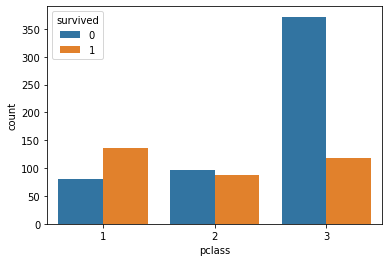

In [51]:
sns.countplot(x="pclass",hue="survived",data=df)

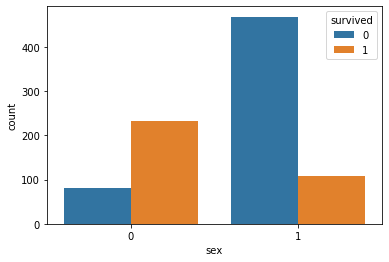

In [52]:
sns.countplot(x="sex",hue="survived",data=df)

In [53]:
# bar chart

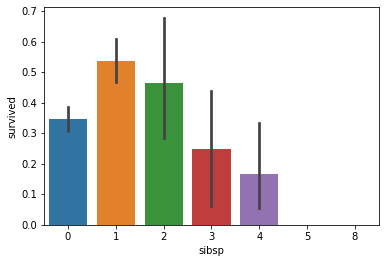

In [54]:
sns.barplot(x="sibsp",y="survived",data=df)

In [55]:
# using pairplot

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


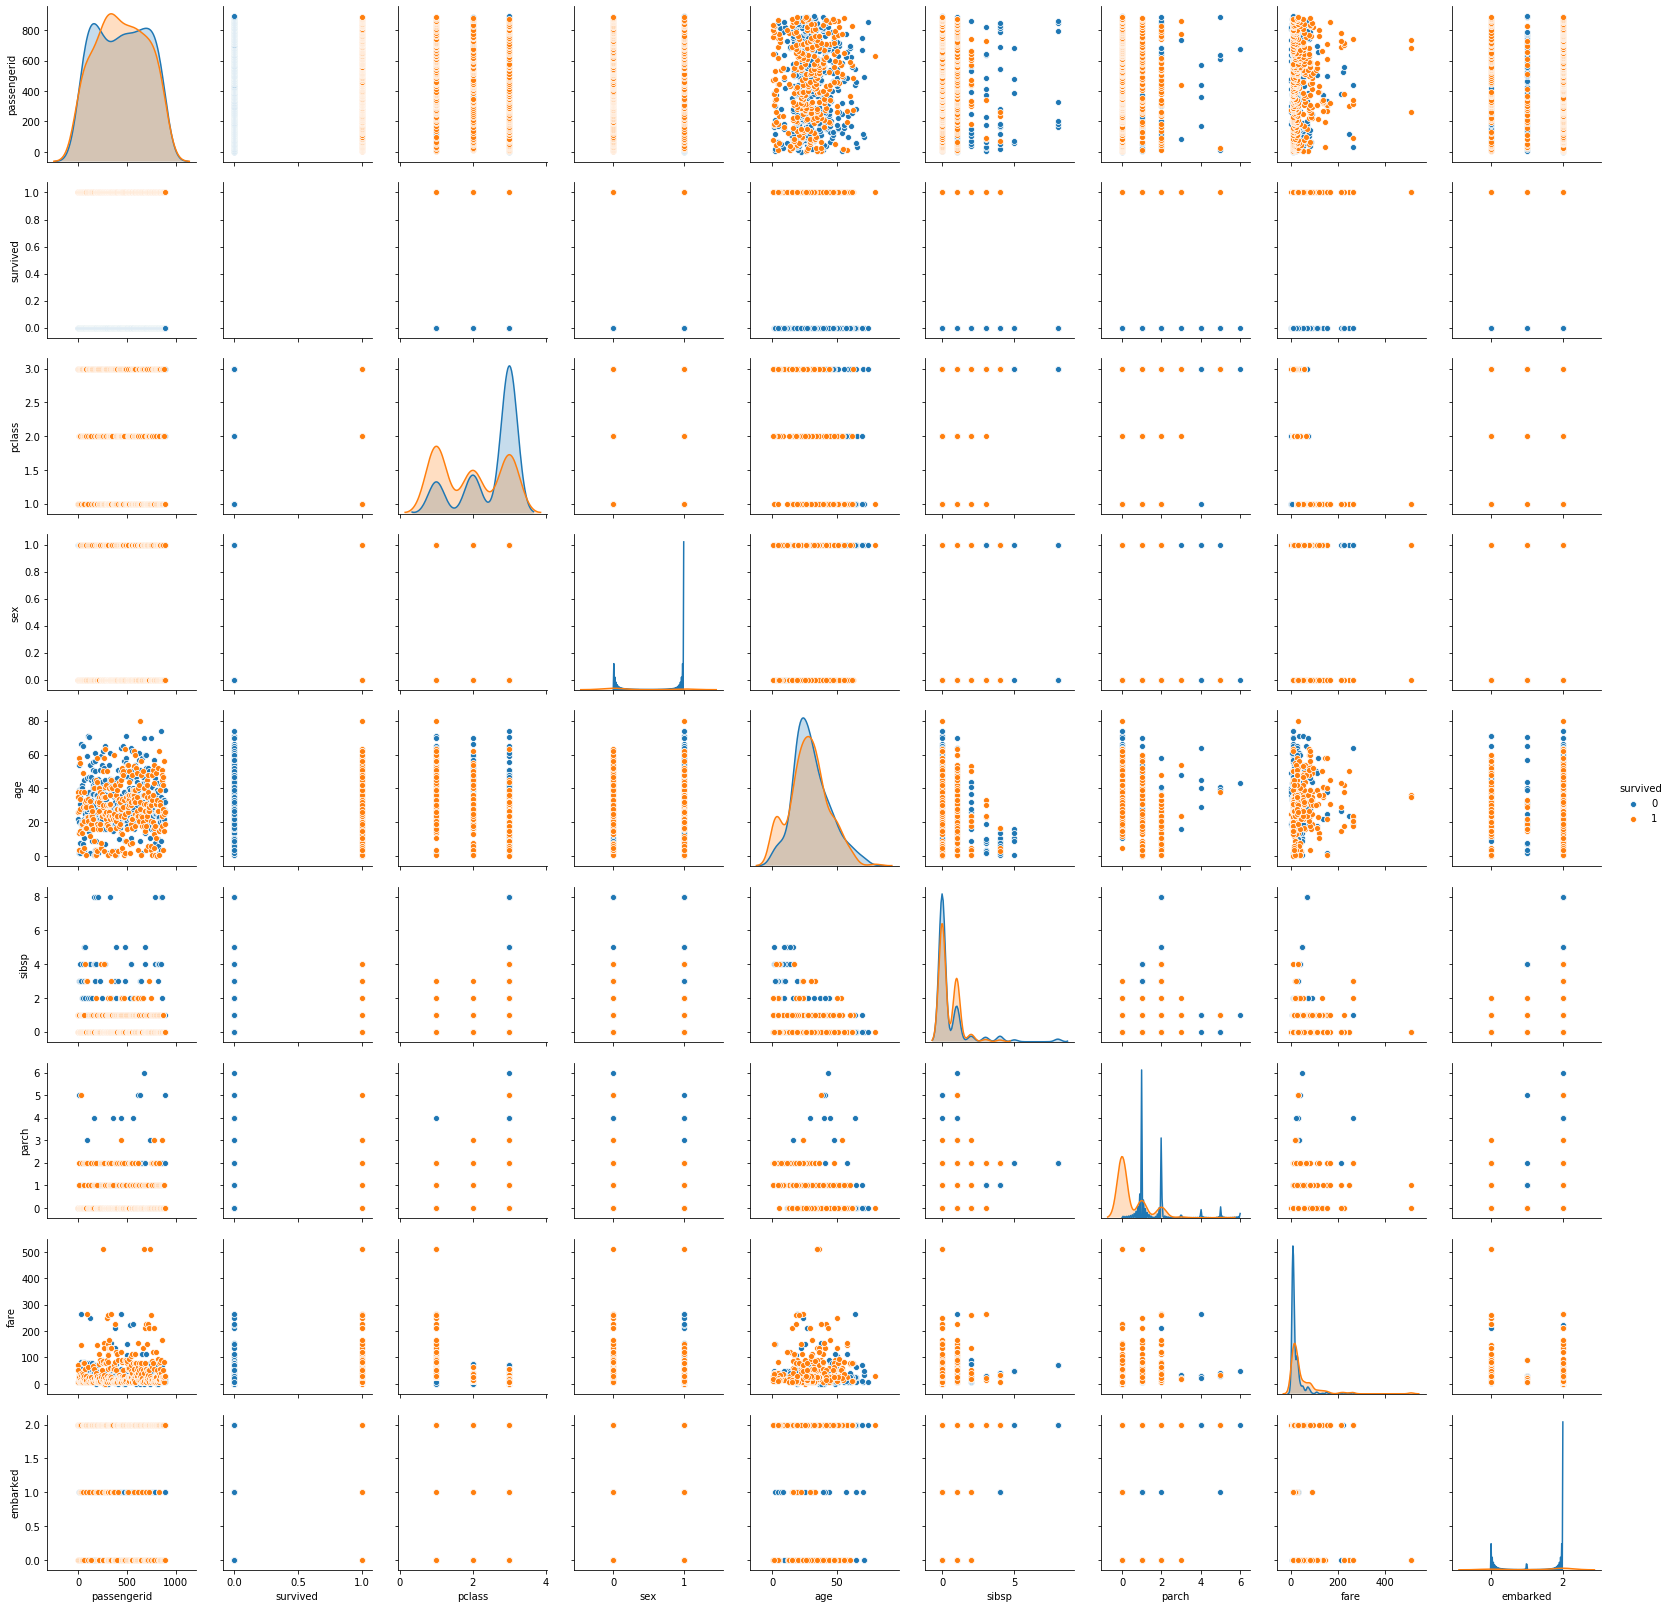

In [56]:
sns.pairplot(df,hue="survived")

In [57]:
# using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022BB0F944E0>,
      dtype=object)

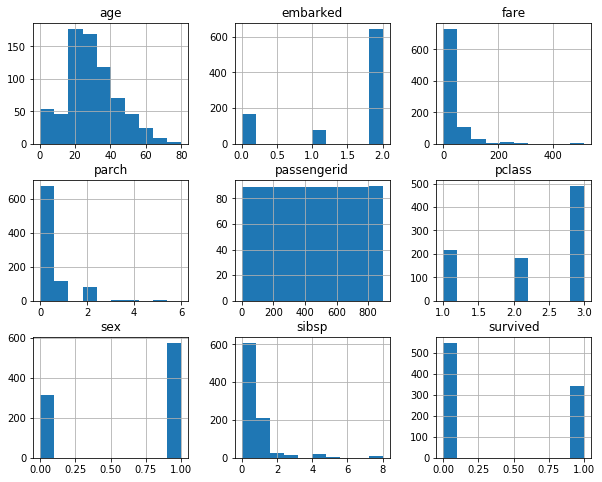

In [58]:
df.hist(figsize=(10,8))

In [59]:
# using scatter plot

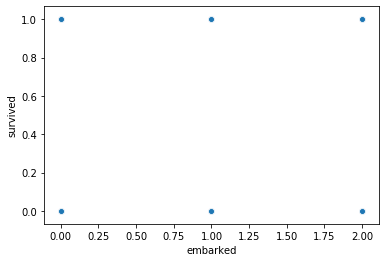

In [60]:
sns.scatterplot(x="embarked",y="survived",data=df)

In [61]:
# heatmap : before using we have to take correlation for this

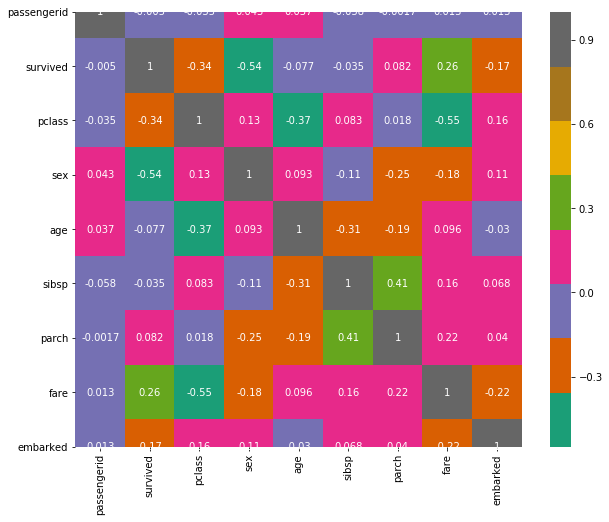

In [62]:
fig=plt.figure(figsize=(10,8))
df_corr=df.corr()
sns.heatmap(df_corr,annot=True,cmap="Dark2")

In [63]:
# Check whether is there any null value present in data

In [64]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
dtype: int64

In [65]:
# filling up null values in age columns

In [66]:
df.age.fillna(df.age.mean(),inplace=True)

In [67]:
# lets check whether we have accurately filled up all null values

In [68]:
df.isna().sum()

passengerid    0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
dtype: int64

In [69]:
# MODEL BUILDING

In [70]:
# lets divide our data in independent and dependent variable 

In [91]:
y=df["survived"]
x=df.drop("survived",axis=1)

In [72]:
# dividing our data in training and test data

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# lets check our train and test data before proceeding further

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 8)
(623,)
(268, 8)
(268,)


In [ ]:
# Lets apply Decision tree classifier algorithm on this dataset

In [77]:
dt=DecisionTreeClassifier()
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [ ]:
# Lets see the prediction value

In [78]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
output

,Actual,Predicted
709,1,0
439,0,1
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,1
500,0,0


In [79]:
print("Accuracy of model is :",accuracy_score(y_test,prediction))

Accuracy of model is : 0.7723880597014925


In [ ]:
# as the accuracy of this model is very low/less we are using other model

In [80]:
rf=RandomForestClassifier()
rf=RandomForestClassifier(criterion="entropy",max_depth=15)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
outputrf=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
outputrf

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [82]:
print("Accuracy of Random forest model is :",accuracy_score(y_test,prediction))

Accuracy of Random forest model is : 0.8134328358208955


In [ ]:
# Still the accuracy is not upto the mark,we will head towards next model

In [84]:
lda=LinearDiscriminantAnalysis()
lda=LinearDiscriminantAnalysis(solver="svd")
lda.fit(x_train,y_train)
prediction=lda.predict(x_test)

In [85]:
outputlda=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
outputlda

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [86]:
print("Accuracy of LDA is :",accuracy_score(y_test,prediction))

Accuracy of LDA is : 0.7947761194029851


In [87]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
prediction=ada.predict(x_test)

In [88]:
outputada=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
outputada

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [89]:
print("Accuracy of Ada is :",accuracy_score(y_test,prediction))

Accuracy of Ada is : 0.8059701492537313


In [ ]:
# using PCA

In [93]:
sc=StandardScaler()
sc.fit(x)
x_std=sc.transform(x)

In [98]:
pca=PCA(n_components=2)
pca.fit(x_std)
pca_trf=pca.transform(x_std)

In [99]:
pca.explained_variance_ratio_

array([0.2317039 , 0.21535596])

In [100]:
new_x=pd.DataFrame(pca_trf,columns=["PC1","PC2"])

In [103]:
newdata=pd.concat([new_x,y],axis=1)

In [104]:
newdata.shape

(891, 3)

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [105]:
newdata.head(1)

,PC1,PC2,survived
0,-1.29289,0.719834,0


In [106]:
y=newdata["survived"]
x=newdata.drop("survived",axis=1)

In [108]:
rf=RandomForestClassifier()
rf=RandomForestClassifier(criterion="entropy",max_depth=20)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [109]:
print("acc is :",accuracy_score(y_test,prediction))

acc is : 0.75


In [110]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
prediction=ada.predict(x_test)

In [111]:
print("acc is :",accuracy_score(y_test,prediction))

acc is : 0.7313432835820896
